In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import statsmodels.stats.api as stats
import statsmodels.formula.api as smf

In [2]:
# Import, assign and display of csv file 
df_PISA_2018 = pd.read_csv("PISA-2018-GBR.csv")
df_PISA_2018

,math_score,read_score,scie_score,gender,immig,homelang,desk,room,quietplace,homecomputer,...,wealth,ictres,schlregion,schllocation,schltype,stratio,schsize,clsize,schid,stuid
0,408.95099,385.14871,426.54361,Female,Second-Generation,Other language,Yes,No,No,No,...,-1.2991,-1.2471,Great Britain: England,A large city (with over 1 000 000 people),Public,15.8053,893,21-25 students,82600001,82603288
1,467.38870,541.75861,488.95981,Female,Second-Generation,Language of the test,Yes,Yes,Yes,Yes,...,-1.4297,-0.3419,Great Britain: England,A large city (with over 1 000 000 people),Public,15.8053,893,21-25 students,82600001,82604013
2,392.49649,300.32700,323.72211,Female,Second-Generation,Other language,Yes,Yes,Yes,Yes,...,-0.7750,-1.2014,Great Britain: England,A large city (with over 1 000 000 people),Public,15.8053,893,21-25 students,82600001,82604218
3,574.38092,584.90240,529.17432,Female,Native,Language of the test,Yes,Yes,Yes,Yes,...,1.4432,1.2943,Great Britain: England,A large city (with over 1 000 000 people),Public,15.8053,893,21-25 students,82600001,82608603
4,494.03201,573.52588,491.84161,Female,Second-Generation,Language of the test,Yes,No,Yes,Yes,...,-0.8366,0.2272,Great Britain: England,A large city (with over 1 000 000 people),Public,15.8053,893,21-25 students,82600001,82610123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5999,408.89560,474.86411,474.02670,Female,First-Generation,Language of the test,Yes,Yes,Yes,Yes,...,0.7437,1.2943,Great Britain: Scotland,A small town (3 000 to about 15 000 people),Public,13.7479,818,26-30 students,82650117,82652486
6000,375.97501,424.91730,413.76730,Female,Native,Language of the test,No,Yes,Yes,Yes,...,0.6913,0.7693,Great Britain: Scotland,A small town (3 000 to about 15 000 people),Public,13.7479,818,26-30 students,82650117,82652708
6001,417.80231,452.36230,419.73901,Male,Native,Language of the test,Yes,Yes,Yes,Yes,...,0.7788,0.6901,Great Britain: Scotland,A small town (3 000 to about 15 000 people),Public,13.7479,818,26-30 students,82650117,82653350
6002,396.27051,340.53760,361.05740,Male,Native,Language of the test,Yes,Yes,Yes,Yes,...,0.0622,0.5236,Great Britain: Scotland,A small town (3 000 to about 15 000 people),Public,13.7479,818,26-30 students,82650117,82654133


In [3]:
# Analysis of main variables - schltype, math_score, read_score, scie_score

## Display main variables from data set 
std_scores = df_PISA_2018[["schltype","math_score","read_score","scie_score"]]
std_scores

,schltype,math_score,read_score,scie_score
0,Public,408.95099,385.14871,426.54361
1,Public,467.38870,541.75861,488.95981
2,Public,392.49649,300.32700,323.72211
3,Public,574.38092,584.90240,529.17432
4,Public,494.03201,573.52588,491.84161
...,...,...,...,...
5999,Public,408.89560,474.86411,474.02670
6000,Public,375.97501,424.91730,413.76730
6001,Public,417.80231,452.36230,419.73901
6002,Public,396.27051,340.53760,361.05740


In [4]:
# Using Boolean indexing to get all the public schools data 
pubschl = (std_scores["schltype"] == "Public")
std_scores[pubschl]

,schltype,math_score,read_score,scie_score
0,Public,408.95099,385.14871,426.54361
1,Public,467.38870,541.75861,488.95981
2,Public,392.49649,300.32700,323.72211
3,Public,574.38092,584.90240,529.17432
4,Public,494.03201,573.52588,491.84161
...,...,...,...,...
5999,Public,408.89560,474.86411,474.02670
6000,Public,375.97501,424.91730,413.76730
6001,Public,417.80231,452.36230,419.73901
6002,Public,396.27051,340.53760,361.05740


In [5]:
# Using Boolean indexing to get all the private school data 
prvschl = ~pubschl
std_scores[prvschl]

,schltype,math_score,read_score,scie_score
9,Private Government-dependent,589.44812,547.73688,614.75238
10,Private Government-dependent,413.70889,447.08539,422.96469
11,Private Government-dependent,378.04260,335.92291,376.16150
12,Private Government-dependent,501.37891,500.70370,464.33481
13,Private Government-dependent,535.41669,605.02777,556.41913
...,...,...,...,...
5772,Private Independent,529.19012,536.64069,520.22168
5773,Private Independent,560.90601,609.69421,619.61108
5774,Private Independent,446.57501,418.34689,470.77090
5775,Private Government-dependent,623.03088,582.71619,582.51410


In [6]:
# Limiting the rows range for public schools to 2304 rows(similar to prvschl) 
pubschl_ = std_scores[pubschl][0:2304] 
pubschl_

,schltype,math_score,read_score,scie_score
0,Public,408.95099,385.14871,426.54361
1,Public,467.38870,541.75861,488.95981
2,Public,392.49649,300.32700,323.72211
3,Public,574.38092,584.90240,529.17432
4,Public,494.03201,573.52588,491.84161
...,...,...,...,...
4228,Public,435.56039,330.42151,397.73560
4229,Public,615.58972,673.51038,627.41309
4230,Public,422.04501,429.59009,397.78430
4231,Public,325.61890,381.32770,345.29950


In [7]:
# Assign std_scores[prvschl] dataframe simillar alias to public school 
prvschl_ = std_scores[prvschl] 

In [8]:
# Computing private shcool mean
prvschl_mean = prvschl_.select_dtypes('number').mean()
prvschl_mean

math_score    531.308153
read_score    534.659254
scie_score    535.713712
dtype: float64

In [9]:
# Computing public shcool mean 
pubschl_mean = pubschl_.select_dtypes('number').mean()
pubschl_mean

math_score    497.297022
read_score    504.433769
scie_score    498.556567
dtype: float64

<Figure size 1000x800 with 0 Axes>

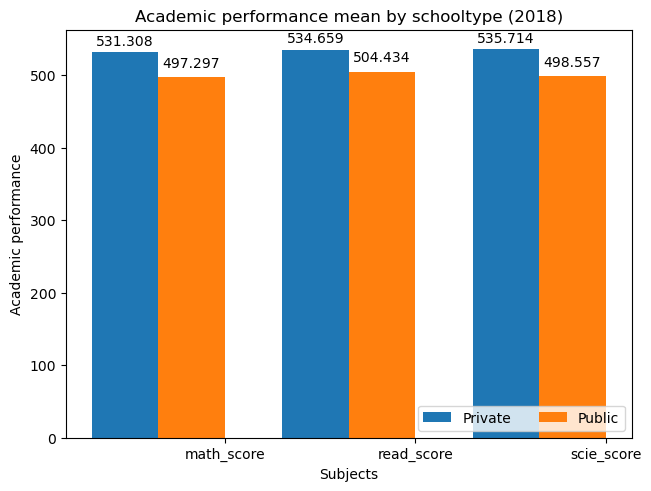

In [15]:
#Creating bar chart for private and public school pupils academic performance (same plot)

# Assigning variables to mean performance in each school 

# X and Y values - private school 
categories1 = list(prvschl_mean.keys())
mean_values1 = list(prvschl_mean)

# X and Y values - public school
categories2 = list(pubschl_mean.keys())
mean_values2 = list(pubschl_mean)

# Creating subplots  

x = np.arange(len(categories1))
bar_width = 0.35
plt.figure(figsize=(10, 8))
fig, ax = plt.subplots(layout='constrained')

# Assigning the bar charts to subplots 
prv_ = plt.bar(x - width/2, mean_values1, width=bar_width, label="Private")
pub_ = plt.bar(x + width/2, mean_values2, width=bar_width, label="Public")

# Labelling 
plt.xlabel("Subjects")
plt.ylabel("Academic performance")
plt.title("Academic performance mean by schooltype (2018)")
plt.xticks(x + width,categories1)
plt.legend(loc="lower right", ncols=3)

plt.bar_label(prv_, padding=3)
plt.bar_label(pub_, padding=5)

plt.show()


In [17]:
#Data analysis using t-test

# Creating sub-samples for each subject in terms of school type 
prvschl_math = prvschl_["math_score"]
pubschl_math = pubschl_["math_score"]

prvschl_read = prvschl_["read_score"]
pubschl_read = pubschl_["read_score"]

prvschl_scie = prvschl_["scie_score"] 
pubschl_scie = pubschl_["scie_score"]

# Tstat test, for means equality (math_score)  
math_test = tstat, pvalue, math = stats.ttest_ind(prvschl_math, pubschl_math, alternative ="two-sided", usevar="unequal")

print(f"MATH : The value of the t-stat statistic is {tstat}")
print(f"The p-value is {pvalue}")

# Tstat test, for means equality for (read_score)  
read_test = tstat, pvalue, read = stats.ttest_ind(prvschl_read, pubschl_read, alternative ="two-sided", usevar="unequal")

print(f"READING : The value of the t-stat statistic is {tstat}")
print(f"The p-value is {pvalue}")

# Tstat test, for means equality for (scie_score)  
scie_test = tstat, pvalue, scie = stats.ttest_ind(prvschl_scie, pubschl_scie, alternative ="two-sided", usevar="unequal")

print(f"SCIENCE : The value of the t-stat statistic is {tstat}")
print(f"The p-value is {pvalue}")

MATH : The value of the t-stat statistic is 14.688416020771498
The p-value is 9.210877912316351e-48
READING : The value of the t-stat statistic is 11.279714995606735
The p-value is 3.9712786227334084e-29
SCIENCE : The value of the t-stat statistic is 14.652055411683339
The p-value is 1.5295833110513138e-47


In [18]:
# Creating new variable total_score for convinience 
df_PISA_2018.loc[:,"total_score"]= df_PISA_2018[["math_score", "read_score", "scie_score"]].sum(axis=1)
df_PISA_2018

,math_score,read_score,scie_score,gender,immig,homelang,desk,room,quietplace,homecomputer,...,ictres,schlregion,schllocation,schltype,stratio,schsize,clsize,schid,stuid,total_score
0,408.95099,385.14871,426.54361,Female,Second-Generation,Other language,Yes,No,No,No,...,-1.2471,Great Britain: England,A large city (with over 1 000 000 people),Public,15.8053,893,21-25 students,82600001,82603288,1220.64331
1,467.38870,541.75861,488.95981,Female,Second-Generation,Language of the test,Yes,Yes,Yes,Yes,...,-0.3419,Great Britain: England,A large city (with over 1 000 000 people),Public,15.8053,893,21-25 students,82600001,82604013,1498.10712
2,392.49649,300.32700,323.72211,Female,Second-Generation,Other language,Yes,Yes,Yes,Yes,...,-1.2014,Great Britain: England,A large city (with over 1 000 000 people),Public,15.8053,893,21-25 students,82600001,82604218,1016.54560
3,574.38092,584.90240,529.17432,Female,Native,Language of the test,Yes,Yes,Yes,Yes,...,1.2943,Great Britain: England,A large city (with over 1 000 000 people),Public,15.8053,893,21-25 students,82600001,82608603,1688.45764
4,494.03201,573.52588,491.84161,Female,Second-Generation,Language of the test,Yes,No,Yes,Yes,...,0.2272,Great Britain: England,A large city (with over 1 000 000 people),Public,15.8053,893,21-25 students,82600001,82610123,1559.39950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5999,408.89560,474.86411,474.02670,Female,First-Generation,Language of the test,Yes,Yes,Yes,Yes,...,1.2943,Great Britain: Scotland,A small town (3 000 to about 15 000 people),Public,13.7479,818,26-30 students,82650117,82652486,1357.78641
6000,375.97501,424.91730,413.76730,Female,Native,Language of the test,No,Yes,Yes,Yes,...,0.7693,Great Britain: Scotland,A small town (3 000 to about 15 000 people),Public,13.7479,818,26-30 students,82650117,82652708,1214.65961
6001,417.80231,452.36230,419.73901,Male,Native,Language of the test,Yes,Yes,Yes,Yes,...,0.6901,Great Britain: Scotland,A small town (3 000 to about 15 000 people),Public,13.7479,818,26-30 students,82650117,82653350,1289.90362
6002,396.27051,340.53760,361.05740,Male,Native,Language of the test,Yes,Yes,Yes,Yes,...,0.5236,Great Britain: Scotland,A small town (3 000 to about 15 000 people),Public,13.7479,818,26-30 students,82650117,82654133,1097.86551


In [21]:
#Linear regression model to consider additional variable, hedres
# Define linear model 
ols_score_model = smf.ols("total_score ~ schltype + hedres", data=df_PISA_2018)

# Check for independent and dependent variables 
print(f"Dependent variable:{ols_score_model.endog_names}")
print(f"Independent variable:{ols_score_model.exog_names}")


Dependent variable:total_score
Independent variable:['Intercept', 'schltype[T.Private Independent]', 'schltype[T.Public]', 'hedres']


In [22]:
# Estimate the linear model coefficients 
estim_score_model = ols_score_model.fit()

# Display a summary of the results 
estim_score_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_score   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     227.6
Date:                Thu, 02 May 2024   Prob (F-statistic):          7.89e-140
Time:                        03:22:43   Log-Likelihood:                -41295.
No. Observations:                6004   AIC:                         8.260e+04
Df Residuals:                    6000   BIC:                         8.263e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                        1556.2022      5.519    281.992      0.000    1545.384    1567.021
schltype[T.Private Independent]   166.7253     12.196     13.671      0.000     142.817     190.633
schltype[T.Public]                -56.2163      6.723     -8.362      0.000     -69.396     -43.037
hedres                             44.3651      3.047     14.558      0.000      38.391      50.339
==============================================================================
Omnibus:                       52.153   Durbin-Watson:                   1.668
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.419
Skew:                          -0.159   Prob(JB):                     1.37e-10
Kurtosis:                       2.717   Cond. No.                         5.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
# Check for estimated parameters 
estim_score_model.params

Intercept                          1556.202161
schltype[T.Private Independent]     166.725270
schltype[T.Public]                  -56.216277
hedres                               44.365141
dtype: float64

In [24]:
# Investigate multicollinearity between hedres and wealth 
# Compute correlation coefficient, hedres and wealth 
df_PISA_2018["hedres"].corr(df_PISA_2018["wealth"])

0.34427466951994207

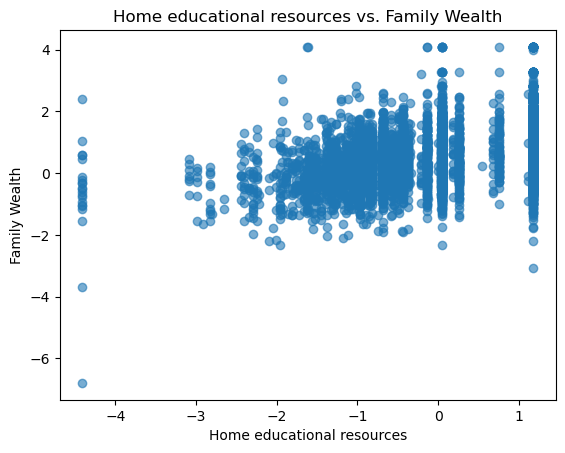

In [25]:
# Visualise relationship between hedres and wealth using scatterplot 
 
plt.scatter("hedres", "wealth",data=df_PISA_2018,
            alpha=0.6)

# Add info
plt.xlabel('Home educational resources')
plt.ylabel('Family Wealth')
plt.title('Home educational resources vs. Family Wealth')
plt.show()


In [26]:
# Investigate multicollinearity between hedres and pared 
# Compute correlation coefficient, hedres and pared 
df_PISA_2018["hedres"].corr(df_PISA_2018["pared"])

0.24061174790218282

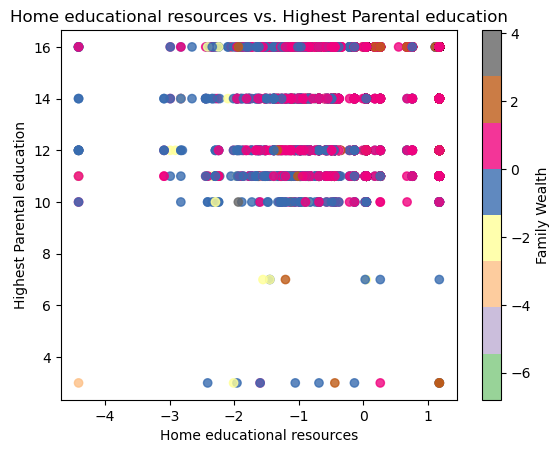

In [27]:
# Visualise relationship between hedres and pared, including wealth, using scatterplot 
plt.scatter("hedres","pared", c="wealth",
            data=df_PISA_2018,
            alpha=0.8,
            cmap='Accent')
plt.colorbar(label="Family Wealth")

# Add info
plt.xlabel('Home educational resources')
plt.ylabel('Highest Parental education')
plt.title('Home educational resources vs. Highest Parental education')
plt.show()

In [28]:
# Investigate correlation between schltype and hedres, wealth, pared 

#Group original data set with the additional variables of interest 
hed_immig_wel_score = df_PISA_2018[["schltype","hedres","wealth","pared","total_score"]]

#Calculate correlation coefficient 
hed_immig_wel_score.groupby("schltype")[["hedres","wealth","pared"]].corr()

hedres    wealth     pared
schltype                                                         
Private Government-dependent hedres  1.000000  0.324951  0.258758
                             wealth  0.324951  1.000000  0.217173
                             pared   0.258758  0.217173  1.000000
Private Independent          hedres  1.000000  0.251470  0.087131
                             wealth  0.251470  1.000000  0.043162
                             pared   0.087131  0.043162  1.000000
Public                       hedres  1.000000  0.348505  0.225340
                             wealth  0.348505  1.000000  0.236994
                             pared   0.225340  0.236994  1.000000

In [29]:
# Develop new variable including additional variables of interest

# Create new model formula 
new_ols_model_formula = "total_score ~ C(schltype) + hedres + wealth + pared"

#Define new model
new_ols_model = smf.ols(new_ols_model_formula, data=df_PISA_2018)

# Check model
print(f"Dependent variable: {new_ols_model.endog_names}")
print(f"Independent variables: {new_ols_model.exog_names}")

Dependent variable: total_score
Independent variables: ['Intercept', 'C(schltype)[T.Private Independent]', 'C(schltype)[T.Public]', 'hedres', 'wealth', 'pared']


In [30]:
#Estimate coefficients 
new_ols_model_estim = new_ols_model.fit()
new_ols_model_estim.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_score   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     154.4
Date:                Thu, 02 May 2024   Prob (F-statistic):          1.02e-154
Time:                        03:37:42   Log-Likelihood:                -41255.
No. Observations:                6004   AIC:                         8.252e+04
Df Residuals:                    5998   BIC:                         8.256e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                           1373.0091     21.315     64.416      0.000    1331.225    1414.794
C(schltype)[T.Private Independent]   156.3906     12.478     12.533      0.000     131.929     180.852
C(schltype)[T.Public]                -56.5772      6.680     -8.470      0.000     -69.672     -43.482
hedres                                39.7627      3.256     12.212      0.000      33.380      46.146
wealth                                -6.3659      3.742     -1.701      0.089     -13.702       0.970
pared                                 13.3118      1.487      8.953      0.000      10.397      16.227
==============================================================================
Omnibus:                       55.485   Durbin-Watson:                   1.693
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.065
Skew:                          -0.171   Prob(JB):                     2.22e-11
Kurtosis:                       2.719   Cond. No.                         102.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
# estimated parametors 
new_ols_model_estim.params

Intercept                             1373.009116
C(schltype)[T.Private Independent]     156.390644
C(schltype)[T.Public]                  -56.577193
hedres                                  39.762719
wealth                                  -6.365919
pared                                   13.311845
dtype: float64

In [32]:
# Investigate new variable immig 

# Necessary to convert immig into a numerical index

# Creating dictionary with conversion mapping of immig from string to numerical
immig_str_to_num = {
    "Native" : 1,
    "Second-Generation" : 2,
    "First-Generation" : 3
}

# Apply the mapping to the immig variables and update data frame
df_PISA_2018["immig"] = df_PISA_2018["immig"].map(immig_str_to_num)

In [33]:
# Calculationg correlation between hedres and immig 
df_PISA_2018["hedres"].corr(df_PISA_2018["immig"])

0.02270740613088124

In [34]:
# Calculationg correlation between wealth and immig 
df_PISA_2018["wealth"].corr(df_PISA_2018["immig"])

-0.16812149630851891

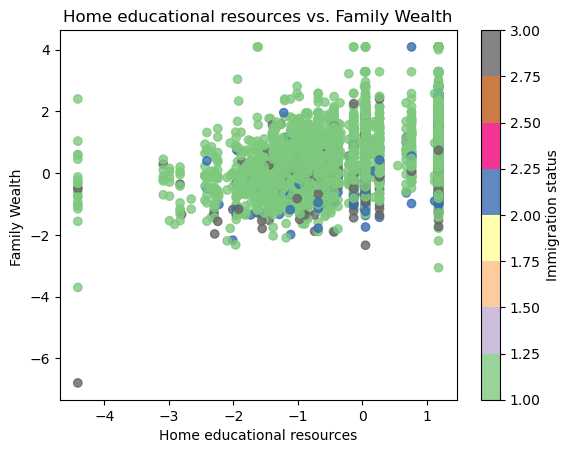

In [35]:
# Visualise relationship between hedres, wealth, including immig, using scatter graph 
plt.scatter("hedres","wealth", c="immig",
            data=df_PISA_2018,
            alpha=0.8,
            cmap='Accent')
plt.colorbar(label="Immigration status")

# Add info
plt.xlabel('Home educational resources')
plt.ylabel('Family Wealth ')
plt.title('Home educational resources vs. Family Wealth')
plt.show()

In [36]:
# Modify new linear model by including immig 

# Modified ols model 
mod_ols_model_formula = "total_score ~ C(schltype) + hedres + wealth + pared + immig"

#Define new model
mod_ols_model = smf.ols(mod_ols_model_formula, data=df_PISA_2018)

# Check model
print(f"Dependent variable: {mod_ols_model.endog_names}")
print(f"Independent variables: {mod_ols_model.exog_names}")

Dependent variable: total_score
Independent variables: ['Intercept', 'C(schltype)[T.Private Independent]', 'C(schltype)[T.Public]', 'hedres', 'wealth', 'pared', 'immig']


In [37]:
#Estimate coefficients - modified model
mod_ols_model_estim = mod_ols_model.fit()
mod_ols_model_estim.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_score   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     137.9
Date:                Thu, 02 May 2024   Prob (F-statistic):          3.45e-164
Time:                        03:42:57   Log-Likelihood:                -41231.
No. Observations:                6004   AIC:                         8.248e+04
Df Residuals:                    5997   BIC:                         8.252e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                           1423.5977     22.421     63.493      0.000    1379.644    1467.551
C(schltype)[T.Private Independent]   164.1421     12.477     13.155      0.000     139.682     188.602
C(schltype)[T.Public]                -59.3105      6.665     -8.899      0.000     -72.375     -46.246
hedres                                41.5543      3.253     12.774      0.000      35.177      47.931
wealth                               -11.9577      3.812     -3.137      0.002     -19.430      -4.486
pared                                 13.4365      1.481      9.072      0.000      10.533      16.340
immig                                -40.6214      5.791     -7.014      0.000     -51.974     -29.269
==============================================================================
Omnibus:                       57.491   Durbin-Watson:                   1.702
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.575
Skew:                          -0.166   Prob(JB):                     1.72e-11
Kurtosis:                       2.703   Cond. No.                         109.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
# Select estimated parametors 
mod_ols_model_estim.params

Intercept                             1423.597707
C(schltype)[T.Private Independent]     164.142065
C(schltype)[T.Public]                  -59.310537
hedres                                  41.554252
wealth                                 -11.957672
pared                                   13.436456
immig                                  -40.621372
dtype: float64

In [41]:
# Considering propotion of each schooltype by schlregion 

# Select schltype and region from the data set 
schl_reg= df_PISA_2018[["schlregion","schltype"]]
schl_reg

# Using Boolean indexing to get all the public schools data 
pub_reg= (schl_reg["schltype"] == "Public")
pub_region = schl_reg[pub_reg][0:2304].value_counts()

# Using Boolean indexing to get all the private schools data
prv_reg = ~pub_reg
prv_region = schl_reg[prv_reg].value_counts()

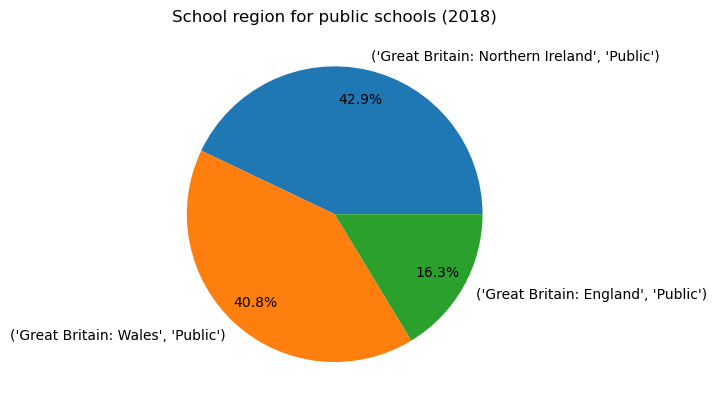

In [42]:
#Pie chart to visualise where public schools are located 
plt.pie(pub_region,labels=pub_region.index,
        autopct='%1.1f%%', pctdistance=0.8)
plt.title("School region for public schools (2018)")

plt.show()

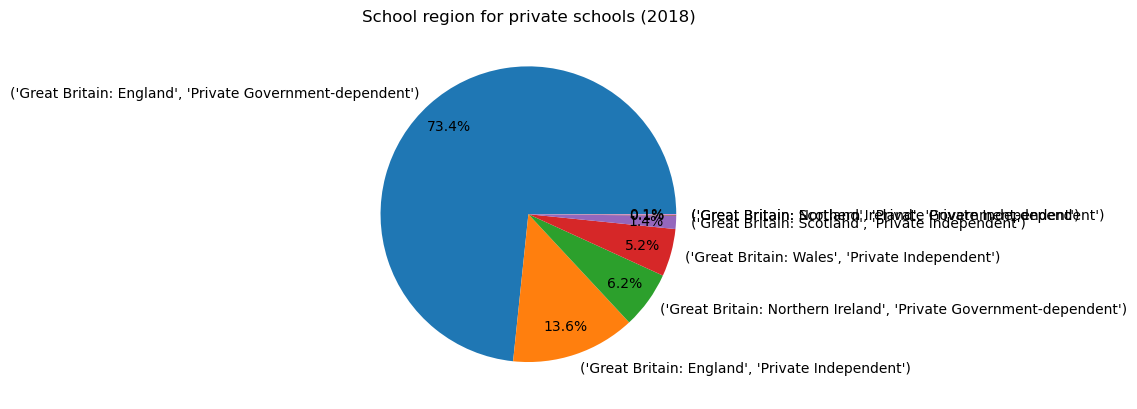

In [43]:
#Pie chart to show where private schools are located 
plt.pie(prv_region,labels=prv_region.index,
        autopct='%1.1f%%', pctdistance=0.8)
plt.title("School region for private schools (2018)")

plt.show()

In [46]:
# Considering relationship between total scores and schlregion

# Using boolean condition to filter England region 
Eng_= (df_PISA_2018["schlregion"]=="Great Britain: England")
Eng_score = df_PISA_2018[Eng_]
Eng_score

# Using boolean condition to filter Scotland region 
Ire_score = (df_PISA_2018["schlregion"]=="Great Britain: Northern Ireland")

# Calculating total score mean based on region 

Eng_score_mean = Eng_score["total_score"].mean()
Ire_score_mean = Scot_score["total_score"].mean()

In [47]:
# England's average score - private school
Eng_score_mean

1574.4342922585859

In [48]:
# Northern Ireland's averge score - public school 
Ire_score_mean

1516.6101982884668